<a href="https://colab.research.google.com/github/SharvinKumarArumugam/Githubproject/blob/main/Fuzzy_Logic_(JIE31903_Computational_Intelligence).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Subject JIE31903 Computational Intelligence
By Khairul Nizar Syazwan, Fakulti Sains Data dan Komputeran, Universiti Malaysia Kelantan

In Python, !pip install scikit-fuzzy is a command that is used in Jupyter Notebook, Google Colab, or IPython to install a Python package named "scikit-fuzzy" using the Python package manager called "pip." The ! at the beginning of the command is used to run shell commands within the notebook environment.

Here's what each part of the command does:

    pip: This is the Python package manager, and it is used to install, upgrade, or manage Python packages and libraries.

    install: This is the pip command to install a package.

    scikit-fuzzy: This is the name of the Python package you want to install. In this case, "scikit-fuzzy" is a package that provides tools and functions for working with fuzzy logic in Python.

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=ceb47a9909a0bff3f17f50646ea8b2fdfd912517b5a5f4452c88b948f7544d29
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Example 1 : The Tipping Problem

Let's create a fuzzy control system which models how you might choose to tip
at a restaurant.  When tipping, you consider the service and food quality,
rated between 0 and 10.  You use this to leave a tip of between 0 and 25%.

Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:

1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

tipping.output['tip']


'\n.. image:: PLOT2RST.current_figure\n\nThe resulting suggested tip is **20.24%**.\n\nFinal thoughts\n--------------\n\nThe power of fuzzy systems is allowing complicated, intuitive behavior based\non a sparse system of rules with minimal overhead. Note our membership\nfunction universes were coarse, only defined at the integers, but\n``fuzz.interp_membership`` allowed the effective resolution to increase on\ndemand. This system can respond to arbitrarily small changes in inputs,\nand the processing burden is minimal.\n\n'

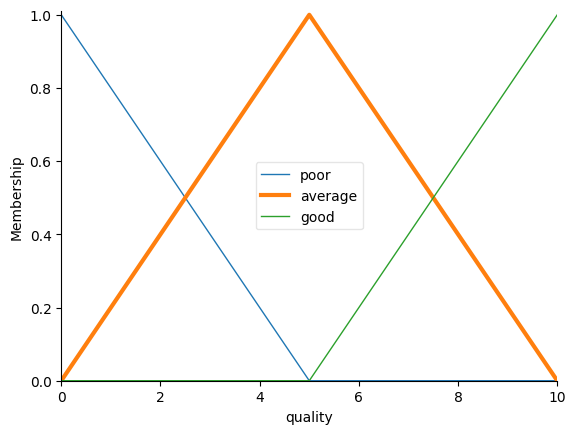

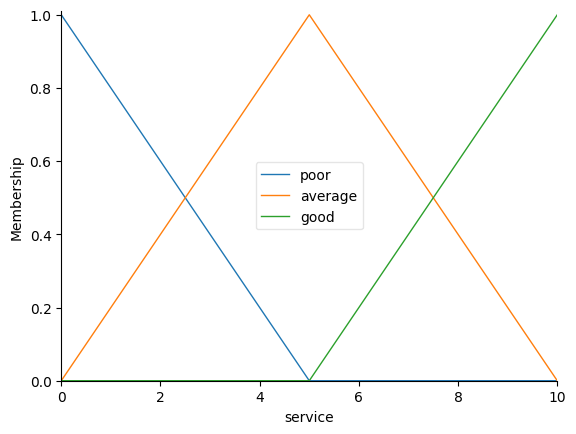

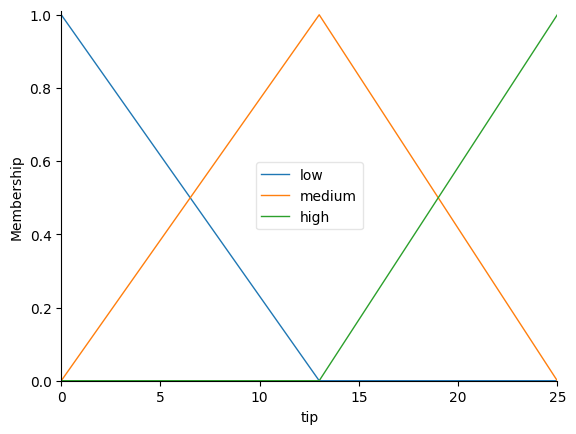

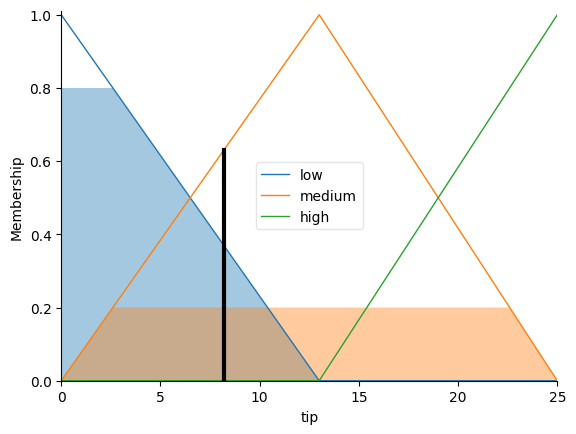

In [ ]:
"""
==========================================
Fuzzy Control Systems: The Tipping Problem
==========================================

The 'tipping problem' is commonly used to illustrate the power of fuzzy logic
principles to generate complex behavior from a compact, intuitive set of
expert rules.

If you're new to the world of fuzzy control systems, you might want
to check out the `Fuzzy Control Primer
<../userguide/fuzzy_control_primer.html>`_
before reading through this worked example.

The Tipping Problem
-------------------

Let's create a fuzzy control system which models how you might choose to tip
at a restaurant.  When tipping, you consider the service and food quality,
rated between 0 and 10.  You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

* Antecednets (Inputs)
   - `service`
      * Universe (ie, crisp value range): How good was the service of the wait
        staff, on a scale of 0 to 10?
      * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
   - `food quality`
      * Universe: How tasty was the food, on a scale of 0 to 10?
      * Fuzzy set: bad, decent, great
* Consequents (Outputs)
   - `tip`
      * Universe: How much should we tip, on a scale of 0% to 25%
      * Fuzzy set: low, medium, high
* Rules
   - IF the *service* was good  *or* the *food quality* was good,
     THEN the tip will be high.
   - IF the *service* was average, THEN the tip will be medium.
   - IF the *service* was poor *and* the *food quality* was poor
     THEN the tip will be low.
* Usage
   - If I tell this controller that I rated:
      * the service as 9.8, and
      * the quality as 6.5,
   - it would recommend I leave:
      * a 20.2% tip.


Creating the Tipping Controller Using the skfuzzy control API
-------------------------------------------------------------

We can use the `skfuzzy` control system API to model this.  First, let's
define fuzzy variables
"""
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

"""
To help understand what the membership looks like, use the ``view`` methods.
"""

# You can see how these look with .view()
quality['average'].view()
"""
.. image:: PLOT2RST.current_figure
"""
service.view()
"""
.. image:: PLOT2RST.current_figure
"""
tip.view()
"""
.. image:: PLOT2RST.current_figure


Fuzzy rules
-----------

Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:

1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the
imprecise rules into a defined, actionable tip is a challenge. This is the
kind of task at which fuzzy logic excels.
"""

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

#rule1.view()

"""
.. image:: PLOT2RST.current_figure

Control System Creation and Simulation
---------------------------------------

Now that we have our rules defined, we can simply create a control system
via:
"""

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

"""
In order to simulate this control system, we will create a
``ControlSystemSimulation``.  Think of this object representing our controller
applied to a specific set of cirucmstances.  For tipping, this might be tipping
Sharon at the local brew-pub.  We would create another
``ControlSystemSimulation`` when we're trying to apply our ``tipping_ctrl``
for Travis at the cafe because the inputs would be different.
"""

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

"""
We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10
and the service 9.8 of 10.
"""
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 4
tipping.input['service'] = 1

# Crunch the numbers
tipping.compute()

"""
Once computed, we can view the result as well as visualize it.
"""
print(f"tipping.output['tip']")
tip.view(sim=tipping)

"""
.. image:: PLOT2RST.current_figure

The resulting suggested tip is **20.24%**.

Final thoughts
--------------

The power of fuzzy systems is allowing complicated, intuitive behavior based
on a sparse system of rules with minimal overhead. Note our membership
function universes were coarse, only defined at the integers, but
``fuzz.interp_membership`` allowed the effective resolution to increase on
demand. This system can respond to arbitrarily small changes in inputs,
and the processing burden is minimal.

"""

Exercise 2a: Fuzzy Logic Self-Driving Train

In this example, we have fuzzy variables for distance to the station, and train acceleration. Fuzzy sets, membership functions, and rules are defined to determine the acceleration based on these inputs. The fuzzy logic system can help control the train's acceleration to optimize its movement.

Please note that this is a highly simplified example, and real self-driven train control systems involve a multitude of complex factors, sensors, and safety mechanisms.

The train acceleration at distance 200 is: 3.27 


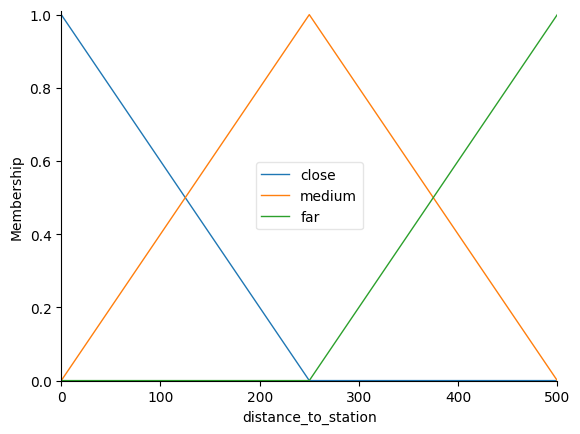

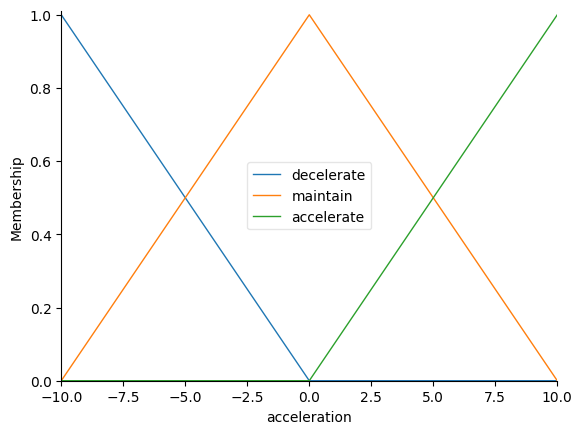

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Create fuzzy variables for train speed, distance to station, and passenger demand
distance_to_station = ctrl.Antecedent(np.arange(0, 501, 1), 'distance_to_station')
acceleration = ctrl.Consequent(np.arange(-10, 11, 1), 'acceleration')

# Define fuzzy sets and membership functions for distance to station
distance_to_station['close'] = fuzz.trimf(distance_to_station.universe, [0, 0, 250])
distance_to_station['medium'] = fuzz.trimf(distance_to_station.universe, [0, 250, 500])
distance_to_station['far'] = fuzz.trimf(distance_to_station.universe, [250, 500, 500])
distance_to_station.view() #---------->

# Define fuzzy sets and membership functions for acceleration
acceleration['decelerate'] = fuzz.trimf(acceleration.universe, [-10, -10, 0])
acceleration['maintain'] = fuzz.trimf(acceleration.universe, [-10, 0, 10])
acceleration['accelerate'] = fuzz.trimf(acceleration.universe, [0, 10, 10])
acceleration.view() #---------->

# Define fuzzy rules
rule1 = ctrl.Rule(distance_to_station['close'], acceleration['decelerate'])
rule2 = ctrl.Rule(distance_to_station['medium'], acceleration['accelerate'])
rule3 = ctrl.Rule(distance_to_station['far'], acceleration['accelerate'])


# Create the control system
acceleration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3] )

# Create a control system simulation
train = ctrl.ControlSystemSimulation(acceleration_ctrl)


print("==========================================")

_distance = 200
train.input['distance_to_station'] = _distance

train.compute()

train_acceleration = train.output['acceleration']
print(f"The train acceleration at distance {_distance:.0f} is: {train_acceleration:.2f} ")



Graph representation

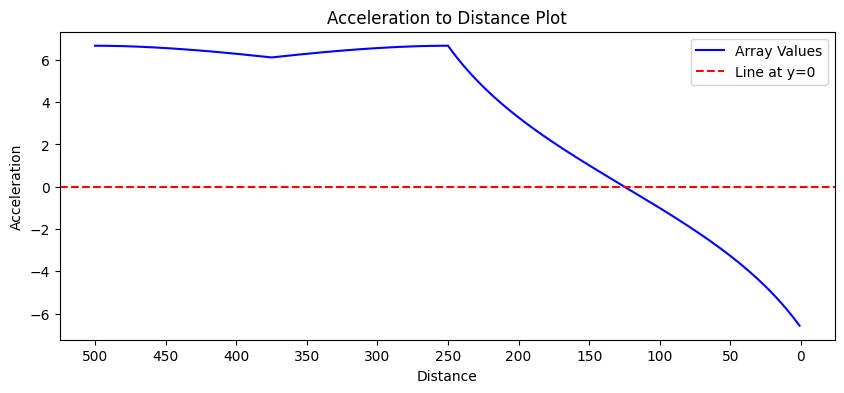

In [ ]:
_distance = 500
array_values = []

for x in range(1, 501):
  # Set the inputs

  train.input['distance_to_station'] = _distance  # Distance to the next station (0-500)

  # Perform fuzzy inference
  train.compute()

  # Get the output acceleration
  train_acceleration = train.output['acceleration']
  array_values.append(train_acceleration)
  #print(f"Distance: {_distance:.0f} Train acceleration: {train_acceleration:.2f}")

  _distance = _distance - 1

#Plotting purposes
plt.figure(figsize=(10, 4))

plt.plot(array_values, 'b', linewidth=1.5, label='Array Values')
plt.axhline(y=0, color='r', linestyle='--', label='Line at y=0')
plt.title('Acceleration to Distance Plot')

#To show reverse in xlabel
tick_positions = range(500, -50, -50)
tick_labels = list(reversed(tick_positions))
plt.xticks(tick_positions, tick_labels)

plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.legend(loc='best')
plt.show()

Exercise 2b: Fuzzy Logic Self-Driving Train

In this example, we have fuzzy variables for train speed, distance to the station, and train acceleration. Fuzzy sets, membership functions, and rules are defined to determine the acceleration based on these inputs. The fuzzy logic system can help control the train's acceleration to optimize its movement.

Please note that this is a highly simplified example, and real self-driven train control systems involve a multitude of complex factors, sensors, and safety mechanisms.

 Speed: 0 Distance: 500 Train acceleration: 6.67
 Speed: 3 Distance: 499 Train acceleration: 6.65
 Speed: 7 Distance: 498 Train acceleration: 6.61
 Speed: 10 Distance: 497 Train acceleration: 6.56
 Speed: 13 Distance: 496 Train acceleration: 6.48
 Speed: 16 Distance: 495 Train acceleration: 6.39
 Speed: 20 Distance: 494 Train acceleration: 6.30
 Speed: 23 Distance: 493 Train acceleration: 6.19
 Speed: 26 Distance: 492 Train acceleration: 6.15
 Speed: 29 Distance: 491 Train acceleration: 6.25
 Speed: 32 Distance: 490 Train acceleration: 6.35
 Speed: 35 Distance: 489 Train acceleration: 6.44
 Speed: 39 Distance: 488 Train acceleration: 6.52
 Speed: 42 Distance: 487 Train acceleration: 6.59
 Speed: 45 Distance: 486 Train acceleration: 6.64
 Speed: 48 Distance: 485 Train acceleration: 6.66
 Speed: 52 Distance: 484 Train acceleration: 5.90
 Speed: 55 Distance: 483 Train acceleration: 5.27
 Speed: 57 Distance: 482 Train acceleration: 5.15
 Speed: 60 Distance: 481 Train acceleration: 5.02
 Sp

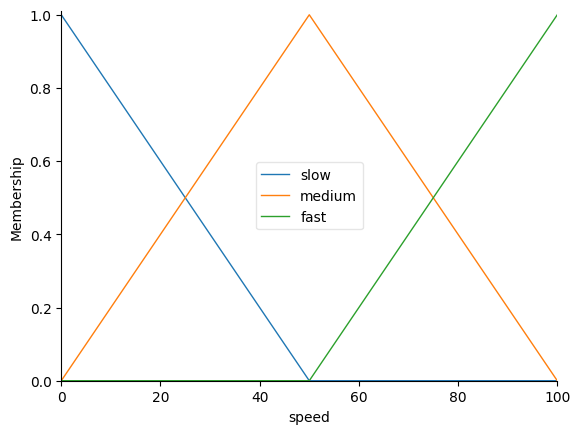

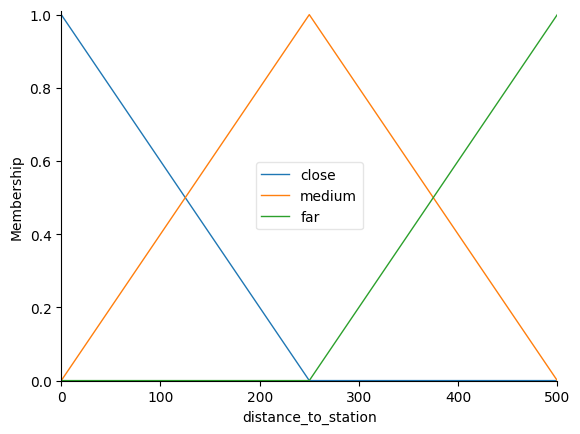

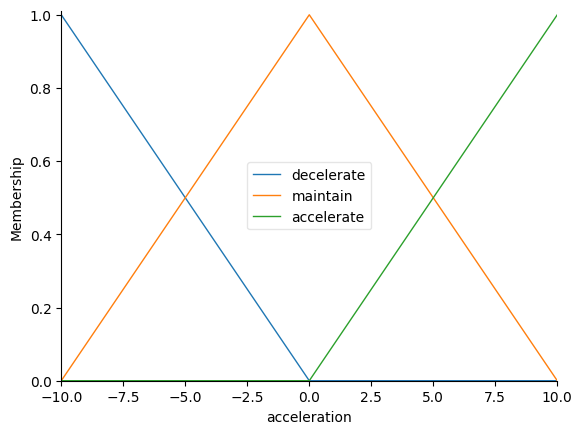

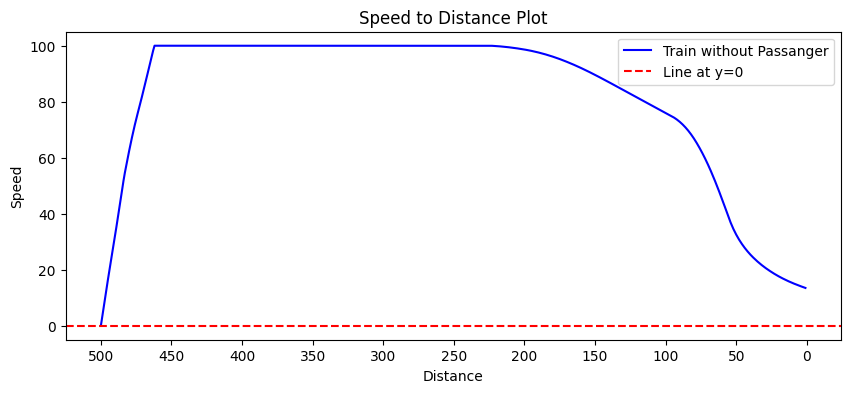

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Create fuzzy variables for train speed, distance to station, and passenger demand
speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
distance_to_station = ctrl.Antecedent(np.arange(0, 501, 1), 'distance_to_station')
passenger_demand = ctrl.Antecedent(np.arange(0, 101, 1), 'passenger_demand')
acceleration = ctrl.Consequent(np.arange(-10, 11, 1), 'acceleration')

# Define fuzzy sets and membership functions for speed
speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [0, 50, 100])
speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])
#speed['slow'] = fuzz.gbellmf(speed.universe, 20, 2.1, 25)
#speed['medium'] = fuzz.gbellmf(speed.universe, 20, 2.1, 50)
#speed['fast'] = fuzz.gbellmf(speed.universe, 20, 2.1, 75)
speed.view() #---------->

# Define fuzzy sets and membership functions for distance to station
distance_to_station['close'] = fuzz.trimf(distance_to_station.universe, [0, 0, 250])
distance_to_station['medium'] = fuzz.trimf(distance_to_station.universe, [0, 250, 500])
distance_to_station['far'] = fuzz.trimf(distance_to_station.universe, [250, 500, 500])
distance_to_station.view() #---------->

# Define fuzzy sets and membership functions for acceleration
acceleration['decelerate'] = fuzz.trimf(acceleration.universe, [-10, -10, 0])
acceleration['maintain'] = fuzz.trimf(acceleration.universe, [-10, 0, 10])
acceleration['accelerate'] = fuzz.trimf(acceleration.universe, [0, 10, 10])
acceleration.view() #---------->

# Define fuzzy rules
rule1 = ctrl.Rule(speed['slow'] & distance_to_station['close'], acceleration['maintain'])
rule2 = ctrl.Rule(speed['slow'] & distance_to_station['medium'], acceleration['accelerate'])
rule3 = ctrl.Rule(speed['slow'] & distance_to_station['far'], acceleration['accelerate'])

rule4 = ctrl.Rule(speed['medium'] & distance_to_station['close'], acceleration['decelerate'])
rule5 = ctrl.Rule(speed['medium'] & distance_to_station['medium'], acceleration['accelerate'])
rule6 = ctrl.Rule(speed['medium'] & distance_to_station['far'], acceleration['accelerate'])

rule7 = ctrl.Rule(speed['fast'] & distance_to_station['close'], acceleration['decelerate'])
rule8 = ctrl.Rule(speed['fast'] & distance_to_station['medium'], acceleration['maintain'])
rule9 = ctrl.Rule(speed['fast'] & distance_to_station['far'], acceleration['accelerate'])


# Create the control system
acceleration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# Create a control system simulation
train = ctrl.ControlSystemSimulation(acceleration_ctrl)

print("==========================================")

_speed = 0
_distance = 500
array_v = []

for x in range(1, 501):
  # Set the inputs

  train.input['speed'] = _speed  # Initial speed of the train (0-100)
  train.input['distance_to_station'] = _distance  # Distance to the next station (0-500)

  # Perform fuzzy inference
  train.compute()

  # Get the output acceleration
  train_acceleration = train.output['acceleration']
  array_v.append(_speed)
  print(f" Speed: {_speed:.0f} Distance: {_distance:.0f} Train acceleration: {train_acceleration:.2f}")
  #print(f"{_speed:.0f}")

  _distance = _distance - 1

  if train_acceleration > 0.05:
    if _speed > 99:
      _speed = 100
    else:
      _speed = _speed + train_acceleration/2
      if _speed > 99:
        _speed = 100
  elif train_acceleration < -0.05:
    if _speed < 0:
      _speed = 0
    else:
      _speed = _speed + train_acceleration/2


plt.figure(figsize=(10, 4))

plt.plot(array_v, 'b', linewidth=1.5, label='Train without Passanger')
plt.axhline(y=0, color='r', linestyle='--', label='Line at y=0')


#To show reverse in xlabel
tick_positions = range(500, -50, -50)
tick_labels = list(reversed(tick_positions))
plt.xticks(tick_positions, tick_labels)

plt.title('Speed to Distance Plot')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.legend(loc='best')
plt.show()

Exercise 2c: Fuzzy Logic Self-Driving Train

In this example, we have fuzzy variables for train speed, distance to the station, passenger demand, and train acceleration. Fuzzy sets, membership functions, and rules are defined to determine the acceleration based on these inputs. The fuzzy logic system can help control the train's acceleration to optimize its movement.

Please note that this is a highly simplified example, and real self-driven train control systems involve a multitude of complex factors, sensors, and safety mechanisms.

diff: 0 Speed: 0 Distance: 500 Train acceleration: 6.67 || Speed1: 0 Distance1: 500 Train acceleration1: 6.67
diff: 0 Speed: 3 Distance: 499 Train acceleration: 6.65 || Speed1: 3 Distance1: 499 Train acceleration1: 5.30
diff: 1 Speed: 7 Distance: 498 Train acceleration: 6.62 || Speed1: 6 Distance1: 498 Train acceleration1: 4.46
diff: 2 Speed: 10 Distance: 497 Train acceleration: 6.59 || Speed1: 8 Distance1: 497 Train acceleration1: 3.85
diff: 3 Speed: 13 Distance: 496 Train acceleration: 6.55 || Speed1: 10 Distance1: 496 Train acceleration1: 3.40
diff: 5 Speed: 17 Distance: 495 Train acceleration: 6.52 || Speed1: 12 Distance1: 495 Train acceleration1: 3.04
diff: 6 Speed: 20 Distance: 494 Train acceleration: 6.48 || Speed1: 13 Distance1: 494 Train acceleration1: 2.75
diff: 8 Speed: 23 Distance: 493 Train acceleration: 6.44 || Speed1: 15 Distance1: 493 Train acceleration1: 2.51
diff: 10 Speed: 26 Distance: 492 Train acceleration: 6.41 || Speed1: 16 Distance1: 492 Train acceleration1: 2.3

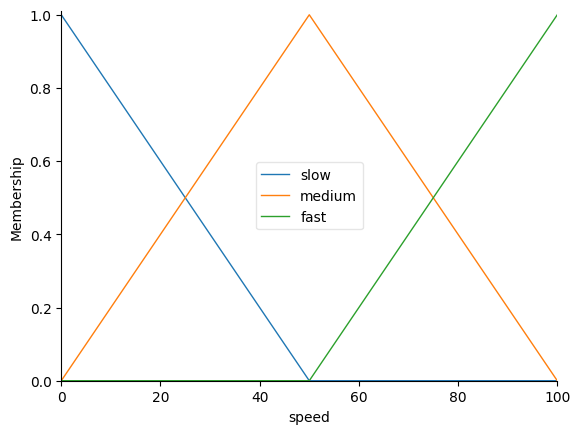

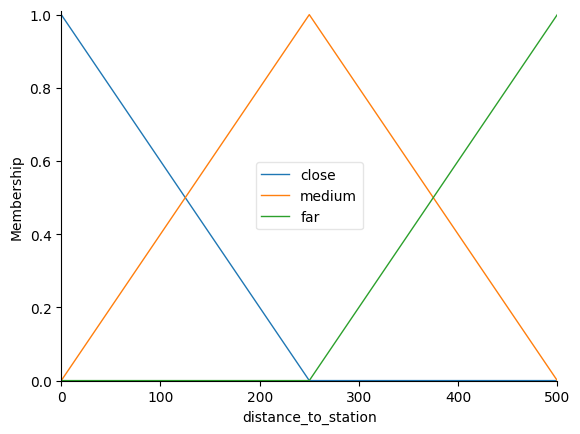

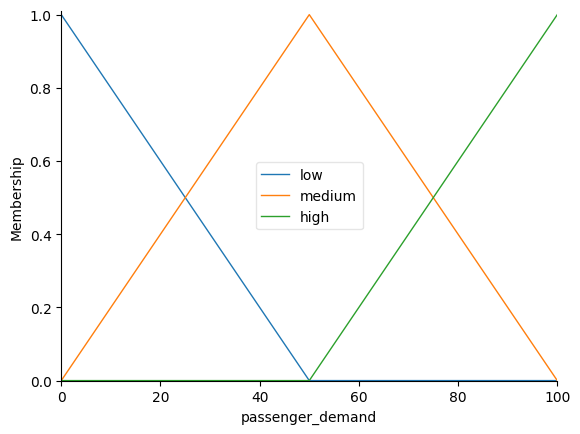

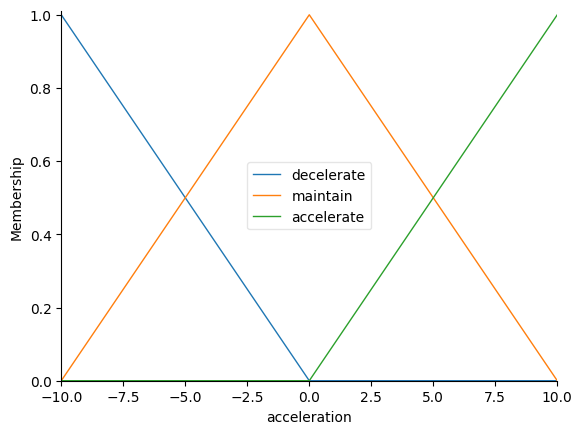

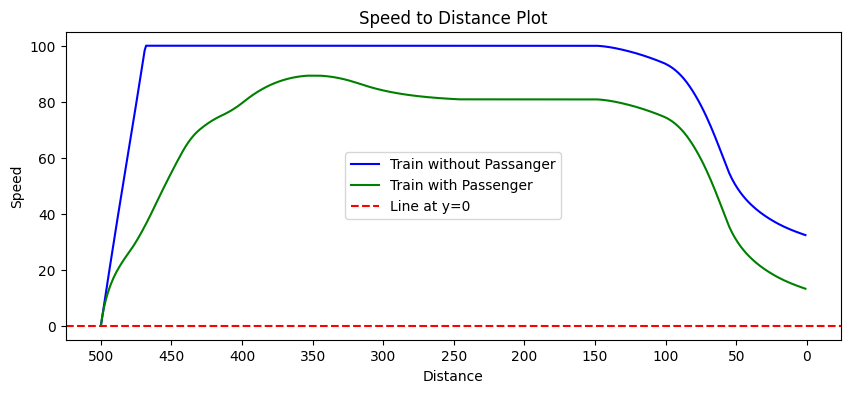

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Create fuzzy variables for train speed, distance to station, and passenger demand
speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
distance_to_station = ctrl.Antecedent(np.arange(0, 501, 1), 'distance_to_station')
passenger_demand = ctrl.Antecedent(np.arange(0, 101, 1), 'passenger_demand')
acceleration = ctrl.Consequent(np.arange(-10, 11, 1), 'acceleration')

# Define fuzzy sets and membership functions for speed
speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [0, 50, 100])
speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])
#speed['slow'] = fuzz.gbellmf(speed.universe, 20, 2.1, 25)
#speed['medium'] = fuzz.gbellmf(speed.universe, 20, 2.1, 50)
#speed['fast'] = fuzz.gbellmf(speed.universe, 20, 2.1, 75)
speed.view() #---------->

# Define fuzzy sets and membership functions for distance to station
distance_to_station['close'] = fuzz.trimf(distance_to_station.universe, [0, 0, 250])
distance_to_station['medium'] = fuzz.trimf(distance_to_station.universe, [0, 250, 500])
distance_to_station['far'] = fuzz.trimf(distance_to_station.universe, [250, 500, 500])
distance_to_station.view() #---------->

# Define fuzzy sets and membership functions for passenger demand
passenger_demand['low'] = fuzz.trimf(passenger_demand.universe, [0, 0, 50])
passenger_demand['medium'] = fuzz.trimf(passenger_demand.universe, [0, 50, 100])
passenger_demand['high'] = fuzz.trimf(passenger_demand.universe, [50, 100, 100])
passenger_demand.view() #---------->

# Define fuzzy sets and membership functions for acceleration
acceleration['decelerate'] = fuzz.trimf(acceleration.universe, [-10, -10, 0])
acceleration['maintain'] = fuzz.trimf(acceleration.universe, [-10, 0, 10])
acceleration['accelerate'] = fuzz.trimf(acceleration.universe, [0, 10, 10])
acceleration.view() #---------->

# Define fuzzy rules
rule1 = ctrl.Rule(speed['slow'] & distance_to_station['close'], acceleration['maintain'])
rule2 = ctrl.Rule(speed['slow'] & distance_to_station['medium'], acceleration['accelerate'])
rule3 = ctrl.Rule(speed['slow'] & distance_to_station['far'], acceleration['accelerate'])

rule4 = ctrl.Rule(speed['medium'] & distance_to_station['close'], acceleration['decelerate'])
rule5 = ctrl.Rule(speed['medium'] & distance_to_station['medium'], acceleration['accelerate'])
rule6 = ctrl.Rule(speed['medium'] & distance_to_station['far'], acceleration['accelerate'])

rule7 = ctrl.Rule(speed['fast'] & distance_to_station['close'], acceleration['decelerate'])
rule8 = ctrl.Rule(speed['fast'] & distance_to_station['medium'], acceleration['maintain'])
rule9 = ctrl.Rule(speed['fast'] & distance_to_station['far'], acceleration['accelerate'])

rule10 = ctrl.Rule(speed['medium'] & distance_to_station['medium'] & passenger_demand['high'], acceleration['decelerate'])
rule11 = ctrl.Rule(speed['medium'] & distance_to_station['far'] & passenger_demand['high'], acceleration['maintain'])
rule12 = ctrl.Rule(speed['fast'] & distance_to_station['far'] & passenger_demand['high'], acceleration['decelerate'])
rule13 = ctrl.Rule(speed['fast'] & distance_to_station['medium'] & passenger_demand['high'], acceleration['decelerate'])
rule14 = ctrl.Rule(speed['fast'] & distance_to_station['close'] & passenger_demand['high'], acceleration['decelerate'])

#Exercise
#15  speed:medium distance:medium passenger:medium = decelerate
#16  speed:medium distance:far pessenger:medium = maintain

# Create the control system
acceleration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
acceleration_ctrl_p = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])

# Create a control system simulation
train = ctrl.ControlSystemSimulation(acceleration_ctrl)
train1 = ctrl.ControlSystemSimulation(acceleration_ctrl_p)


print("==========================================")

_speed = 0
_distance = 500
_speed1 = 0
_distance1 = 500
array_v = []
array_v_wif_p = []

for x in range(1, 501):
  # Set the inputs

  train.input['speed'] = _speed  # Initial speed of the train (0-100)
  train.input['distance_to_station'] = _distance  # Distance to the next station (0-500)
  train1.input['speed'] = _speed1  # Initial speed of the train (0-100)
  train1.input['distance_to_station'] = _distance1  # Distance to the next station (0-500)
  train1.input['passenger_demand'] = 70  # Passenger demand (0-100)

  # Perform fuzzy inference
  train.compute()
  train1.compute()

  # Get the output acceleration
  train_acceleration = train.output['acceleration']
  train_acceleration1 = train1.output['acceleration']
  array_v.append(_speed)
  array_v_wif_p.append(_speed1)
  print(f"diff: {_speed-_speed1:.0f} Speed: {_speed:.0f} Distance: {_distance:.0f} Train acceleration: {train_acceleration:.2f} || Speed1: {_speed1:.0f} Distance1: {_distance1:.0f} Train acceleration1: {train_acceleration1:.2f}")
  #print(f"{_speed:.0f}")

  _distance = _distance - 1
  _distance1 = _distance1 - 1

  if train_acceleration > 0.05:
    if _speed > 99:
      _speed = 100
    else:
      _speed = _speed + train_acceleration/2
      if _speed > 99:
        _speed = 100
  elif train_acceleration < -0.05:
    if _speed < 0:
      _speed = 0
    else:
      _speed = _speed + train_acceleration/2

  if train_acceleration1 > 0.05:
    if _speed1 > 99:
      _speed1 = 100
    else:
      _speed1 = _speed1 + train_acceleration1/2
      if _speed1 > 99:
        _speed1 = 100
  elif train_acceleration1 < -0.05:
    if _speed1 < 0:
      _speed1 = 0
    else:
      _speed1 = _speed1 + train_acceleration1/2

plt.figure(figsize=(10, 4))

plt.plot(array_v, 'b', linewidth=1.5, label='Train without Passanger')
plt.plot(array_v_wif_p, 'g', linewidth=1.5, label='Train with Passenger')
plt.axhline(y=0, color='r', linestyle='--', label='Line at y=0')


#To show reverse in xlabel
tick_positions = range(500, -50, -50)
tick_labels = list(reversed(tick_positions))
plt.xticks(tick_positions, tick_labels)

plt.title('Speed to Distance Plot')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.legend(loc='best')
plt.show()



Example 3a: Generalized Bell & Trapezoidal Membership Function

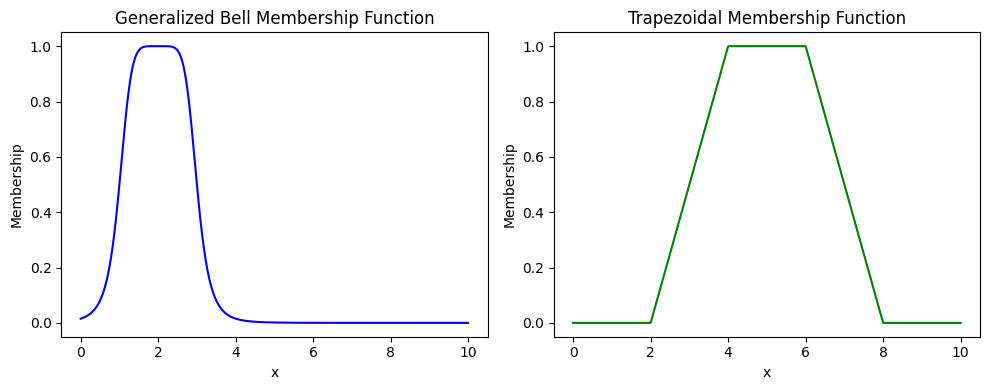

In [ ]:
# Import necessary libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Create a universe of discourse for input or output
x = np.linspace(0, 10, 1000)

# Generalized Bell function membership function
bell_mf = fuzz.gbellmf(x, c=2, a=1, b=3)

# Trapezoidal membership function
trapezoidal_mf = fuzz.trapmf(x, [2, 4, 6, 8])

# Plot the membership functions
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, bell_mf, 'b', linewidth=1.5, label='Bell MF')
plt.title('Generalized Bell Membership Function')
plt.xlabel('x')
plt.ylabel('Membership')

plt.subplot(1, 2, 2)
plt.plot(x, trapezoidal_mf, 'g', linewidth=1.5, label='Trapezoidal MF')
plt.title('Trapezoidal Membership Function')
plt.xlabel('x')
plt.ylabel('Membership')

plt.tight_layout()
plt.show()

Example 3b: Generalized Bell & Trapezoidal Membership Function

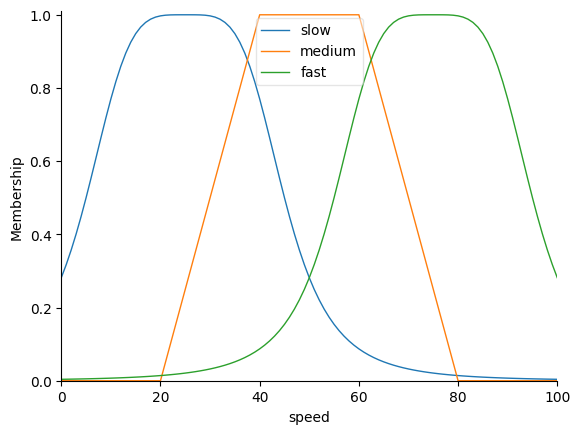

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Create fuzzy variables for train speed, distance to station, and passenger demand
speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')

# Define fuzzy sets and membership functions for speed
#speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
#speed['medium'] = fuzz.trimf(speed.universe, [0, 50, 100])
#speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])
speed['slow'] = fuzz.gbellmf(speed.universe, 20, 2.1, 25)
speed['medium'] = fuzz.trapmf(speed.universe, [20, 40, 60, 80])
speed['fast'] = fuzz.gbellmf(speed.universe, 20, 2.1, 75)
speed.view() #---------->
